### IMPORTING NECESSARY LIBRARIES

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns                   #Visualisation
import matplotlib.pyplot as plt         #Visualisation
import plotly.subplots as sp            #Visualisation
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Reading CSV file world_population.csv

In [85]:
df = pd.read_csv("E:/Unified Mentor Projects/world_population.csv",header=0)  #Load the dataset into dataframe

In [86]:
df.head() #Printing Head(First 5 rows) of the dataframe

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [87]:
df.shape  #Printing the Total Dimensions(Rows,Columns) of the dataframe

(234, 17)

In [88]:
df.info()  #Describing the data Types of each Column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [89]:
df.isnull().sum()  #Checking Missing(null) Values in the dataframe

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [90]:
print(f"Number of Duplicate Values: {df.duplicated().sum()}")

Number of Duplicate Values: 0


In [91]:
df.columns #Printing the Column names of the dataset

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [92]:
df.drop(['CCA3','Capital'],axis=1).head()  #Data Cleaning

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


### Exploratory Data Analysis (EDA)

#### Plotting Group Bar Chart For populations of 5 Continents of 1970,80,90,2000,2010,2015,2020,2022 respectively

<Figure size 1400x800 with 0 Axes>

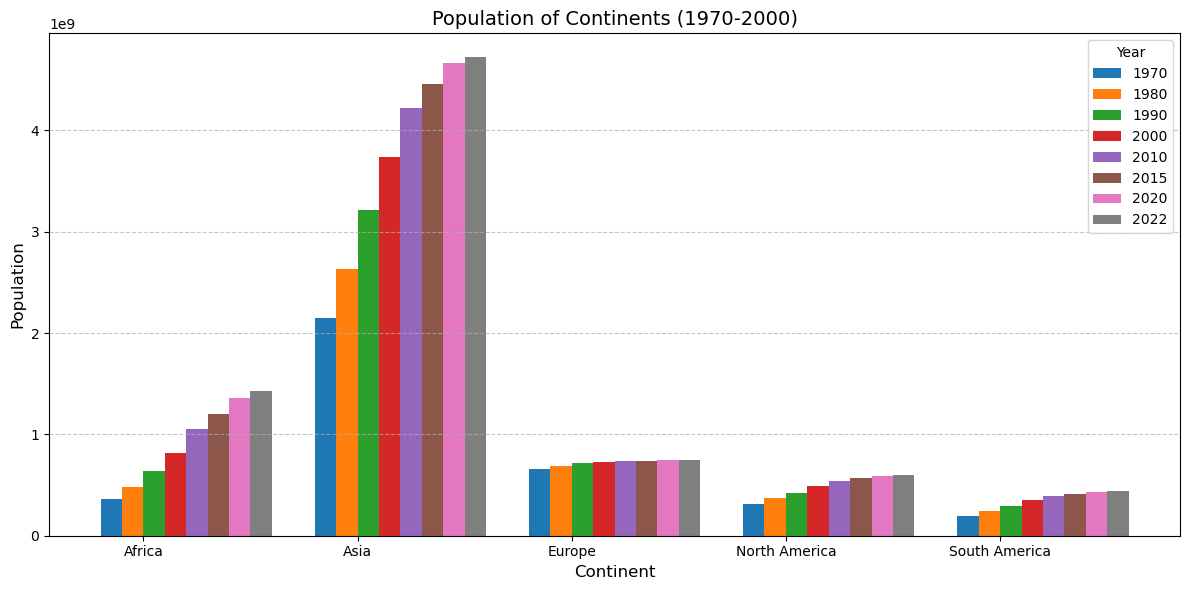

In [95]:
plt.figure(figsize=(14,8))
population_columns = ['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America']

# Aggregate population df by continent
continent_population = df[df['Continent'].isin(continents)].groupby('Continent')[population_columns].sum()

# Plot grouped bar chart
years = ['1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022']
x = range(len(continents))
bar_width = 0.1

fig, ax = plt.subplots(figsize=(12, 6))

for i, year in enumerate(years):
    ax.bar(
        [pos + i * bar_width for pos in x], 
        continent_population[f"{year} Population"], 
        bar_width, 
        label=year
    )

# Set the labels and title
ax.set_xlabel('Continent', fontsize=12)
ax.set_ylabel('Population', fontsize=12)
ax.set_title('Population of Continents (1970-2000)', fontsize=14)
ax.set_xticks([pos + 1.5 * bar_width for pos in x])
ax.set_xticklabels(continents, fontsize=10) 
ax.legend(title='Year')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Plotting number of countries by respective Continents

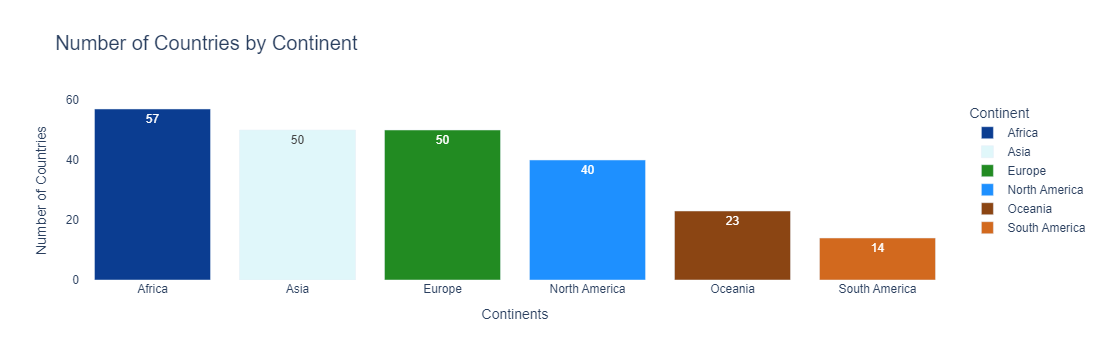

In [97]:
custom_palette = ['#0b3d91', '#e0f7fa', '#228b22', '#1e90ff', '#8B4513', '#D2691E','#DAA520', '#556B2F']
countries_by_continent = df['Continent'].value_counts().reset_index()
# Create the bar chart
fig = px.bar(
countries_by_continent,
x='Continent',
y='count',
color='Continent',
text='count',
title='Number of Countries by Continent',
color_discrete_sequence=custom_palette
)
# Customize the layout
fig.update_layout(
xaxis_title='Continents',
yaxis_title='Number of Countries',
plot_bgcolor='rgba(0,0,0,0)', # Set the background color to transparent
font_family='Arial', # Set font family
title_font_size=20 # Set title font size
)
# Show the plot
fig.show()

#### Plotting World Population Percentage by Continent with Pie Chart

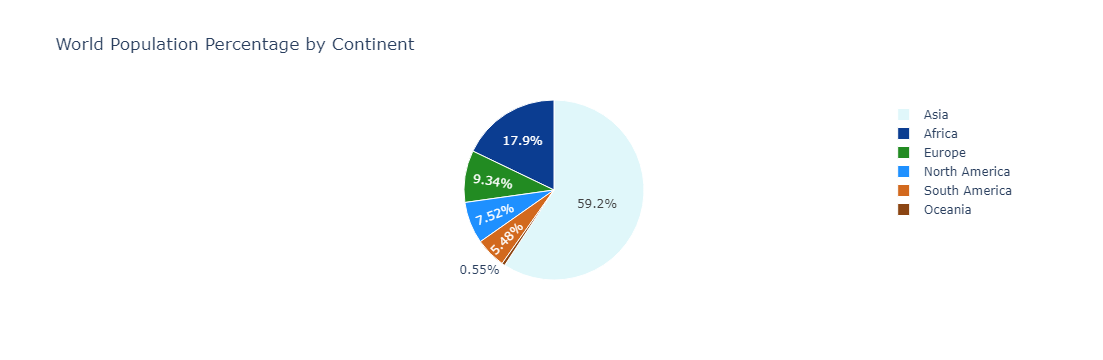

In [99]:
continent_population_percentage = df.groupby('Continent')['World Population Percentage'].sum().reset_index()
fig = go.Figure(data=[go.Pie(labels=continent_population_percentage['Continent'],values=continent_population_percentage['World Population Percentage'])])
# Update layout
fig.update_layout(
title='World Population Percentage by Continent',
template='plotly',
paper_bgcolor='rgba(255,255,255,0)', # Set the paper background color to transparent
plot_bgcolor='rgba(255,255,255,0)' # Set the plot background color to transparent
)
# Update pie colors
fig.update_traces(marker=dict(colors=custom_palette, line=dict(color='#FFFFFF',
width=1)))
# Show the plot
fig.show()


#### Plotting Population Trends of Continent 

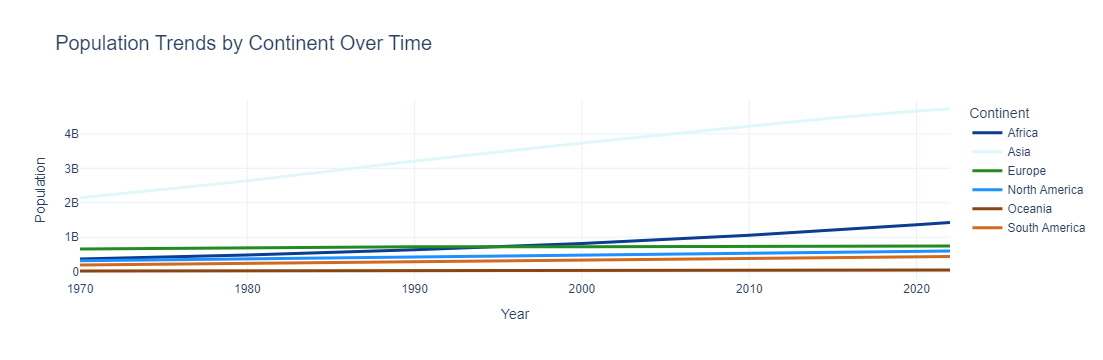

In [101]:
df_melted = df.melt(id_vars=['Continent'],
value_vars=['2022 Population', '2020 Population', '2015 Population','2010 Population', '2000 Population', '1990 Population','1980 Population', '1970 Population'],
var_name='Year',
value_name='Population')
# Convert 'Year' to a more suitable format
df_melted['Year'] = df_melted['Year'].str.split().str[0].astype(int)
# Aggregate population by continent and year
population_by_continent = df_melted.groupby(['Continent','Year']).sum().reset_index()
fig = px.line(population_by_continent, x='Year', y='Population', color='Continent',
title='Population Trends by Continent Over Time',
labels={'Population': 'Population', 'Year': 'Year'},
color_discrete_sequence=custom_palette)
fig.update_layout(
template='plotly_white',
xaxis_title='Year',
yaxis_title='Population',
font_family='Arial',
title_font_size=20,
)
fig.update_traces(line=dict(width=3))
fig.show()

#### Plotting Top 8 most Populated Countries in the year 2022

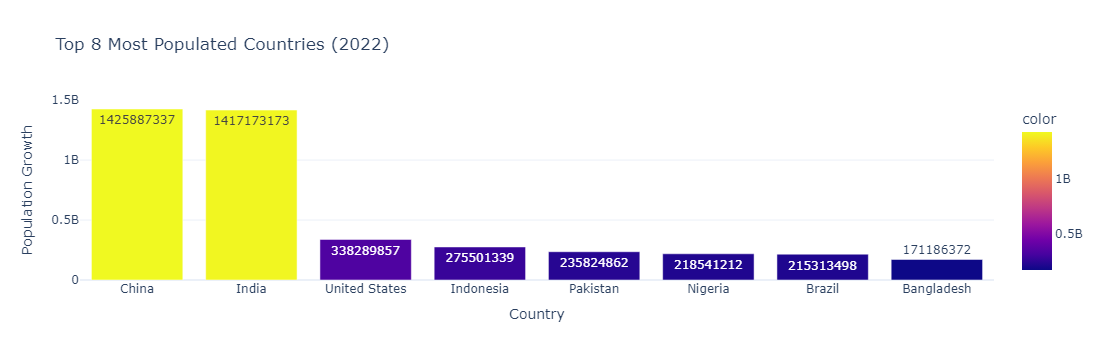

In [103]:
top_8_populated_countries_1970 = df.groupby('Country/Territory')['1970 Population'].sum().sort_values(ascending=False).head(8)
top_8_populated_countries_2022 = df.groupby('Country/Territory')['2022 Population'].sum().sort_values(ascending=False).head(8)
features = {'top_8_populated_countries_1970': top_8_populated_countries_1970, 'top_8_populated_countries_2022': top_8_populated_countries_2022}
for feature_name, feature_df in features.items():
    year = feature_name.split('_')[-1] # Extract the year from the feature name
    fig = px.bar(x=feature_df.index,
                 y=feature_df.values,
                 text=feature_df.values,
                 color=feature_df.values,
                 title=f'Top 8 Most Populated Countries ({year})',
                 template='plotly_white')
fig.update_layout(xaxis_title='Country',
yaxis_title='Population Growth')
fig.show()

#### Plotting Geographical Distribution of Land Area by Country 

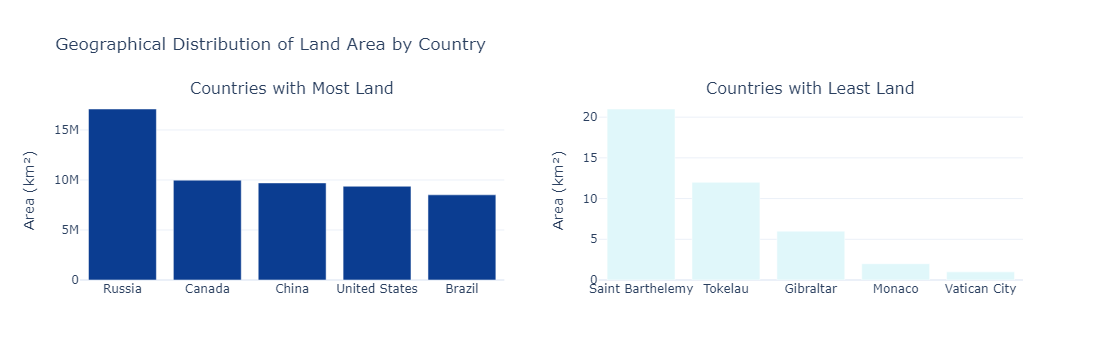

In [105]:
land_by_country = df.groupby('Country/Territory')['Area (km²)'].sum().sort_values(ascending=False)
most_land = land_by_country.head(5)
least_land = land_by_country.tail(5)
# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Countries with Most Land","Countries with Least Land"))
# Plot countries with the most land
fig.add_trace(go.Bar(x=most_land.index, y=most_land.values, name='Most Land',marker_color=custom_palette[0]), row=1, col=1)
# Plot countries with the least land
fig.add_trace(go.Bar(x=least_land.index, y=least_land.values, name='Least Land',marker_color=custom_palette[1]), row=1, col=2)
fig.update_layout(
title_text="Geographical Distribution of Land Area by Country",showlegend=False,template='plotly_white')
fig.update_yaxes(title_text="Area (km²)", row=1, col=1)
fig.update_yaxes(title_text="Area (km²)", row=1, col=2)
fig.show()

#### Plotting Bar Chart between World Population Percentage and Revenue generated by the Continents

Text(0.5, 0, 'Revenue')

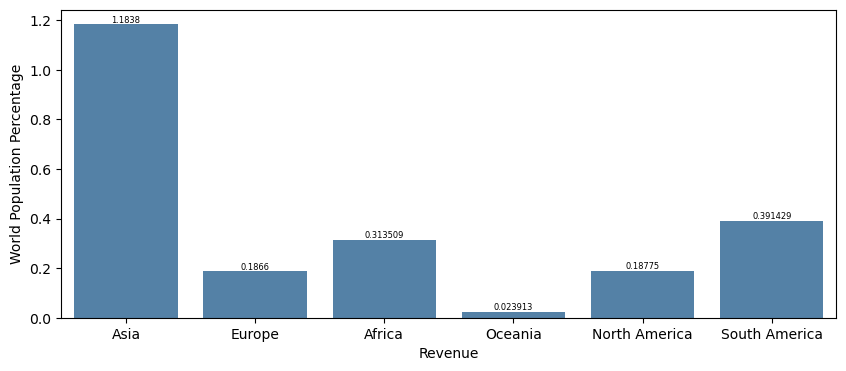

In [107]:
plt.figure(figsize=(10,4))
x = sns.barplot(data=df,x='Continent',y='World Population Percentage',color='steelblue',errorbar=None)
x.bar_label(x.containers[0], fontsize=6)
plt.xlabel('Revenue')

### Model Building
#### Predecting future Population and saving it to the required destination folder

In [109]:
population_columns = [
    "1970 Population", "1980 Population", "1990 Population",
    "2000 Population", "2010 Population", "2015 Population",
    "2020 Population", "2022 Population"
]

years = [int(col.split()[0]) for col in population_columns]

df_long = df.melt(
    id_vars=["Country/Territory"],
    value_vars=population_columns,
    var_name="Year",
    value_name="Population"
)
df_long["Year"] = df_long["Year"].str.extract(r'(\d{4})').astype(int)

# Initialize dictionary to store future predictions
future_predictions = {}

# Train linear regression for each country
for country in df["Country/Territory"].unique():
    country_df = df_long[df_long["Country/Territory"] == country]

    X = country_df["Year"].values.reshape(-1, 1)
    y = country_df["Population"].values

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict future values (2030, 2040, 2050)
    future_years = np.array([2030, 2040, 2050]).reshape(-1, 1)
    predictions = model.predict(future_years)

    # Store predictions
    future_predictions[country] = {
        year: int(pred) for year, pred in zip(future_years.flatten(), predictions)
    }

# Convert predictions to a dfFrame

predictions_df = pd.DataFrame(future_predictions).T
predictions_df.index.name = "Country/Territory"

# Merge predictions back into the original dfset
for year in [2030, 2040, 2050]:
    df[f"{year} Population"] = df["Country/Territory"].map(
        lambda x: future_predictions[x][year] if x in future_predictions else None
    )
# Save the predictions to a CSV file
output_path = 'E:/Unified Mentor Projects/future_population_predictions.csv'
predictions_df.to_csv(output_path)

print(f"Future population predictions saved to: {output_path}")


Future population predictions saved to: E:/Unified Mentor Projects/future_population_predictions.csv


In [110]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,2030 Population,2040 Population,2050 Population
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,42591050,48823104,55055158
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,3022113,3061958,3101803
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,48846773,54777752,60708731
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,55980,59635,63290
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,91284,102200,113116


#### Plotting Future population of Zimbabwe of the year 2030,2040 and 2050 respectively

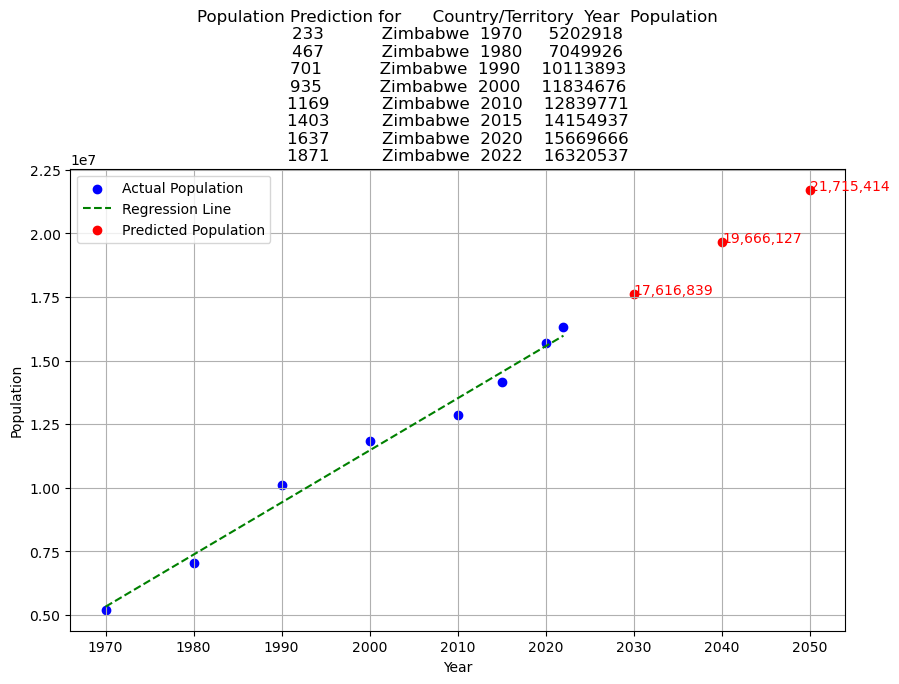

In [112]:
def predict_future_populations_and_plot(country_name, df_long, model, future_years, X):
    # Filter data for the selected country
    country_df = df_long[df_long["Country/Territory"] == country_name]
    
    # Check if the country exists in the dataset
    if country_name not in df_long["Country/Territory"].unique():
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    # Predict future populations
    predictions = model.predict(future_years)
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(country_df["Year"], country_df["Population"], color='blue', label='Actual Population')
plt.plot(country_df["Year"], model.predict(X), color='green', linestyle='--', label='Regression Line')
plt.scatter(future_years, predictions, color='red', label='Predicted Population')

    # Annotate future predictions
for year, pred in zip(future_years.flatten(), predictions):
    plt.text(year, pred, f'{int(pred):,}', fontsize=10, color='red', ha='left')
    
plt.title(f'Population Prediction for {country_df}')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()

### Model Evaluation

In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

        # Predict on the given data
y_pred = model.predict(X)

        # Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y, y_pred)

        # Print the results
print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}",2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

    


Model Evaluation:
Mean Absolute Error (MAE): 376285.28 2
Mean Squared Error (MSE): 183921050977.02
Root Mean Squared Error (RMSE): 428860.18
R-squared (R²): 0.99
